<font color='tomato'><font color="#CC3D3D"><p>
# Regression with scikit-learn

#### 자주 사용하는 사이킷런 모듈
- 데이터 정제(Data Cleasing) & 속성 공학(Feature Engineering)
    - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
    - sklearn.feature_selection: 속성선택
    - sklearn.feature_extraction: 속성추출(이미지나 텍스트에서 속성 추출)
- 모형 성능 평가와 개선
    - sklearn.model_selection: 데이터 분리, 검증 및 파라미터 튜닝(GridSearch 등)
    - sklearn.metrics: 성능평가(Recall, Precision, AUC 등)
- 지도학습(Supervised Learning) 알고리즘
    - sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
    - sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
    - sklearn.svm: Support Vector Machines (SVM)
    - sklearn.tree: 의사결정나무(Decision Trees)
- 비지도학습(Unsupervised Learning) 알고리즘
    - sklearn.cluster: 군집분석(K-means, DBSCAN 등)
    - sklearn.decomposition: 차원축소(PCA, SVD 등)
- 유틸리티와 데이터 세트 
    - sklearn.pipeline: 워크플로우 효율화
    - sklearn.datasets: 예제 데이터 세트(iris, digits 데이터 등) 
    
#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공    

In [1]:
import sklearn
sklearn.__version__

'1.1.3'

#### 데이터 준비

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

C:\Users\shj06\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [7]:
X =  boston.data
y = boston.target

In [8]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
print(X.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


보스턴 주택 가격 데이터: 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
 - CRIM: 범죄율
 - ZN: 25,000 평방피트를 초과 거주지역 비율
 - INDUS: 비소매상업지역 면적 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 - NOX: 일산화질소 농도
 - RM: 주택당 방 수
 - AGE: 1940년 이전에 건축된 주택의 비율
 - DIS: 직업센터의 거리
 - RAD: 방사형 고속도로까지의 거리
 - TAX: 재산세율
 - PTRATIO: 학생/교사 비율
 - B: 인구 중 흑인 비율
 - LSTAT: 인구 중 하위 계층 비율

#### 데이터 분할

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 모형 생성 - 선형회귀분석

In [12]:
from sklearn.linear_model import LinearRegression #모델 불러오기

In [13]:
model = LinearRegression() #linear regression 선형회귀모형 
#logistic regressor 은 분류문제에서만 씀(classifier)
#모델 호출 

In [14]:
model.fit(X_train, y_train) #학습데이터를 fitting으로 적용해주기 
#회귀문제는 분류문제와 좀 다름

LinearRegression()

#### 모형 검토

In [15]:
print(model.coef_)
print(model.intercept_)

[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
37.937107741833685


#### 모형 평가

In [16]:
model.score(X_test, y_test) # R-square(r2_score)

0.6733825506400172

#### 분석결과 시각화

In [17]:
y_pred = model.predict(X_test)
y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Predicted')

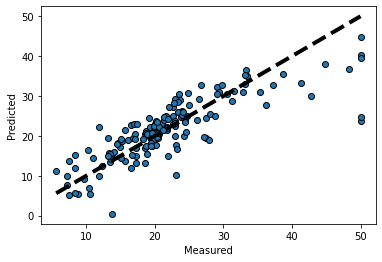

In [19]:
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')

#### 새로운 모형 생성 - 회귀나무모형

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6835179161458892

In [28]:
# 정해진 형식으로 예측결과를 저장
import pandas as pd

output = pd.DataFrame({'house_id': range(X_test.shape[0]), 'house_price': y_pred})
output.to_csv('submission.csv', index=False)

<font color='tomato'><font color="#CC3D3D"><p>
# End